# Tunneling simulation

In [113]:
using DifferentialEquations
using Plots
gr(format=:png,dpi=17*2)

Plots.GRBackend()

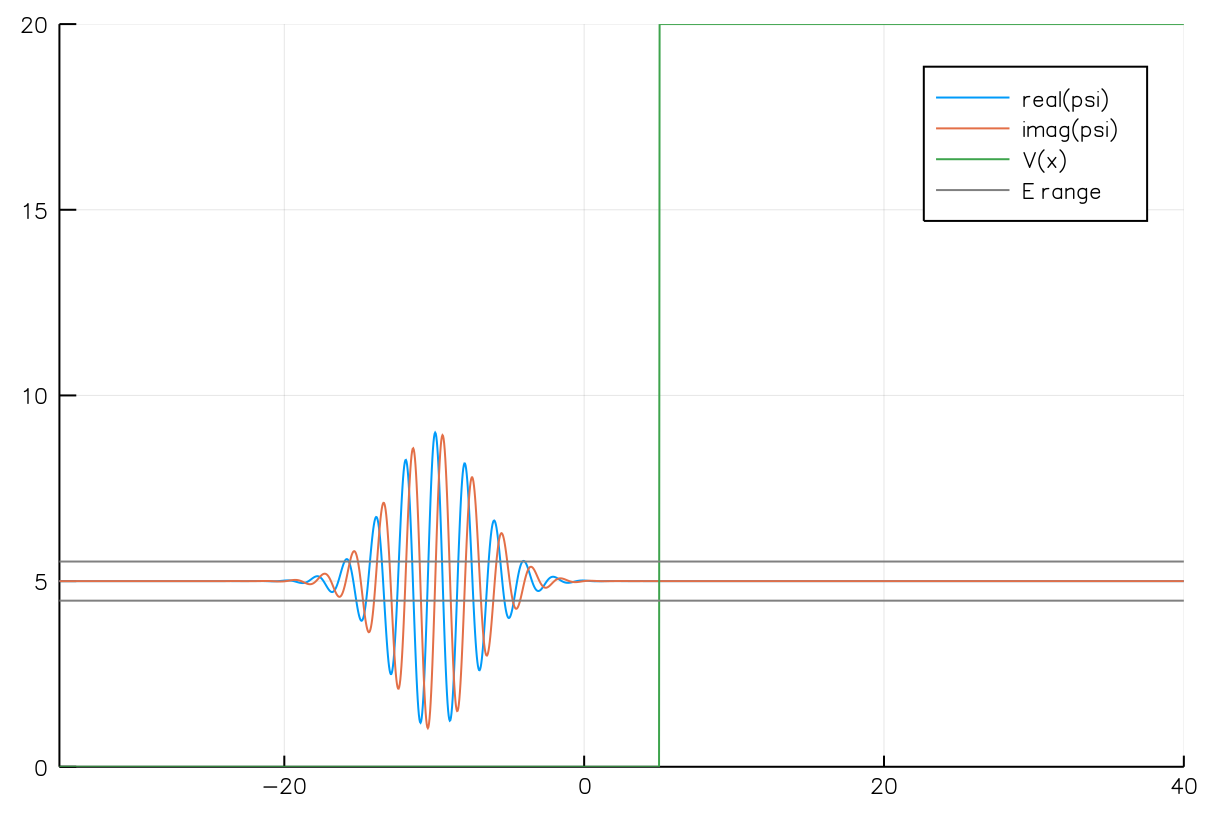

In [404]:
# direct time-dependent schrodinger equation using finite differences in space.
function f(dψ,ψ,p,t)
    n = length(ψ)
    V = p[1]
    dx = p[2]
    for i=2:n-1
        dψ[i] = 0.5im*(ψ[i-1] - 2ψ[i] + ψ[i+1])/dx^2 - 1.0im*V[i]*ψ[i]
    end
    dψ[1] = 0.5im*(0.0im - 2ψ[1] + ψ[2])/dx^2 - 1.0im*V[1]*ψ[1]
    dψ[n] = 0.5im*(ψ[n-1] - 2ψ[n] + 0.0im)/dx^2 - 1.0im*V[n]*ψ[n]
end

n = 2000
x = linspace(-35,40,n)

E = 5 #14
k = sqrt(2*E)
V0 = 20.0
Δx = 3.0
ΔE = k/(2*Δx)
sf = V0/5

ψ0 = exp.(-(x+10).^2/(2*Δx^2)).*cis.(k*x)
V = V0 .* (x .> 5) #.& (x .< 8))

#V = V0 .* (tanh.((x-5)*10) .+ 1) .* (1 .- tanh.((x-6)*10)) / 4

#V[2:end] = (V[1:end-1] .+ V[2:end]) ./ 2

p = (V,x[2]-x[1])
tspan = (0.0,10.0)

#plot(x,real.(ψ0).*sf + E)
#plot!(x,imag.(ψ0).*sf + E)
#plot!(x,V)
#vline!([-15,-15+sqrt(2),-15+2*sqrt(2)])

plot(x,real.(ψ0).*sf + E,ylims=(0.0,V0),label="real(psi)")
plot!(x,imag.(ψ0).*sf + E,label="imag(psi)")
plot!(x,V,label="V(x)")
hline!([E-ΔE,E+ΔE],color=:grey,label="E range")

In [405]:
# gotta love DifferentialEquations.jl...
prob = ODEProblem(f,ψ0,tspan,p)

a = solve(prob);
a.retcode

:Success

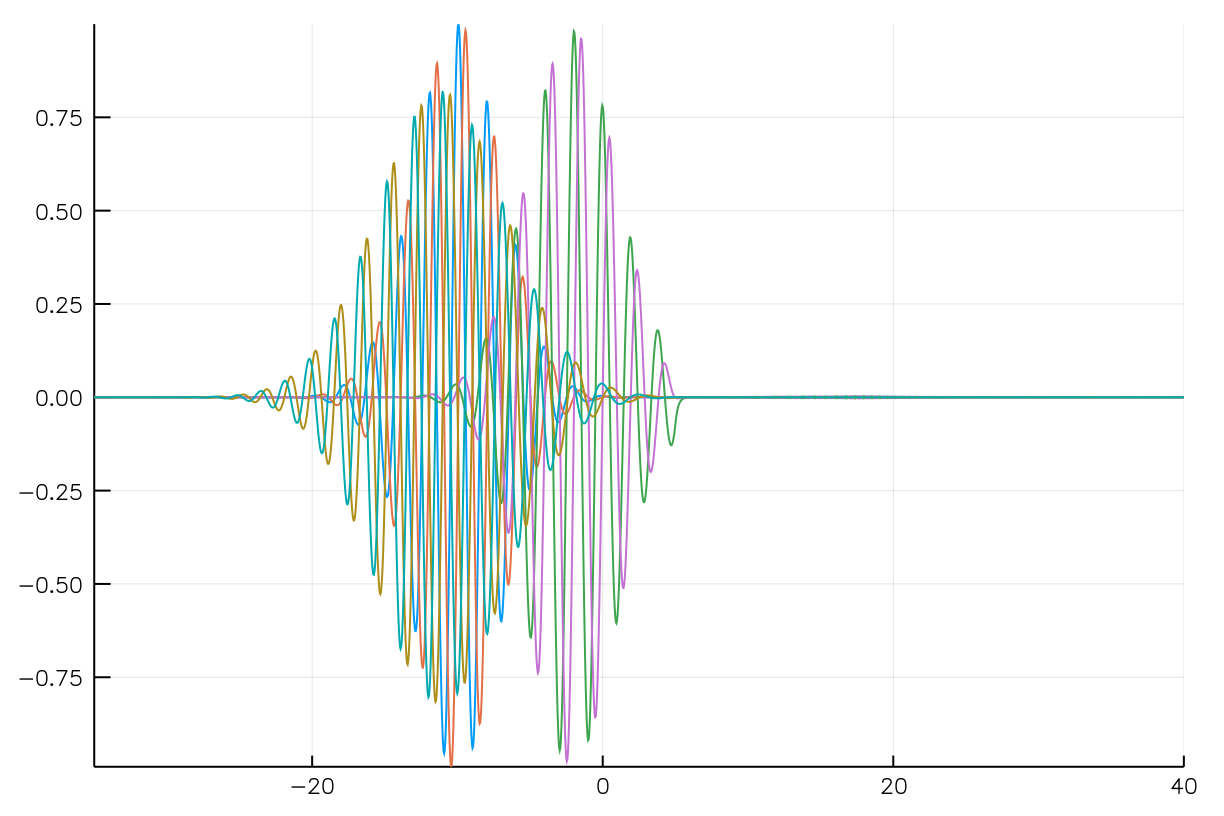

In [406]:
plot(x,real.(a(0)),legend=false)
plot!(x,imag.(a(0)))

plot!(x,real.(a(2.5)))
plot!(x,imag.(a(2.5)))

plot!(x,real.(a(tspan[2])) |> smooth)
plot!(x,imag.(a(tspan[2])) |> smooth)

In [407]:
function smooth(x,rl=2)
    n = length(x)
    conv(x,fill(1.0/rl,rl))[1:n]
end

In [407]:
nf = 200

anim = @animate for t=linspace(tspan[1],tspan[2],nf)
    plot(x,real.(a(t)).*sf + E  |> smooth,ylims=(-5,V0+5),label="real(psi)",ylabel="psi, V, E",xlabel="x",
        linewidth=2, xlims=(-20,20))
    plot!(x,imag.(a(t)).*sf + E |> smooth,label="imag(psi)",linewidth=2)
    plot!(x,V,label="V(x)",linewidth=2)
    hline!([E-ΔE,E+ΔE],color=:grey,label="E range")
end every 1
gif(anim,"deleteme.gif",fps=20)

INFO: Saved animation to /home/brant/class/modern/flip/6_Schrodinger/animations/deleteme.gif


Plots.AnimatedGif("/home/brant/class/modern/flip/6_Schrodinger/animations/deleteme.gif")

In [382]:
nf = 200

#zoom case; use E=14, barrier width 1, potential 20, 2000 point resolution.

anim = @animate for t=linspace(1,5,nf) #t=linspace(tspan[1],tspan[2],nf)
    plot(x,real.(a(t)).*sf + E  |> smooth,ylims=(-5,V0+5),label="real(psi)",ylabel="psi, V, E",xlabel="x",
        linewidth=2, xlims=(2,8))
    plot!(x,imag.(a(t)).*sf + E |> smooth,label="imag(psi)",linewidth=2)
    plot!(x,V,label="V(x)",linewidth=2)
    hline!([E-ΔE,E+ΔE],color=:grey,label="E range")
end every 1
gif(anim,"deleteme.gif",fps=20)

INFO: Saved animation to /home/brant/class/modern/flip/6_Schrodinger/animations/deleteme.gif


Plots.AnimatedGif("/home/brant/class/modern/flip/6_Schrodinger/animations/deleteme.gif")